Creado por [Mauricio Lozada](https://https://www.instagram.com/maudinnok/)

Este es un ejercicio de continuación del Análisis de Datos con Python pero ahora usando un modelo de Machine Learning de Regresión Lineal para predecir el valor de las casas. Usando el conjunto de datos de California Housing Prices extraído de Kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
import pandas as pd

datos = pd.read_csv("housing.csv")

In [ ]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
datos["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

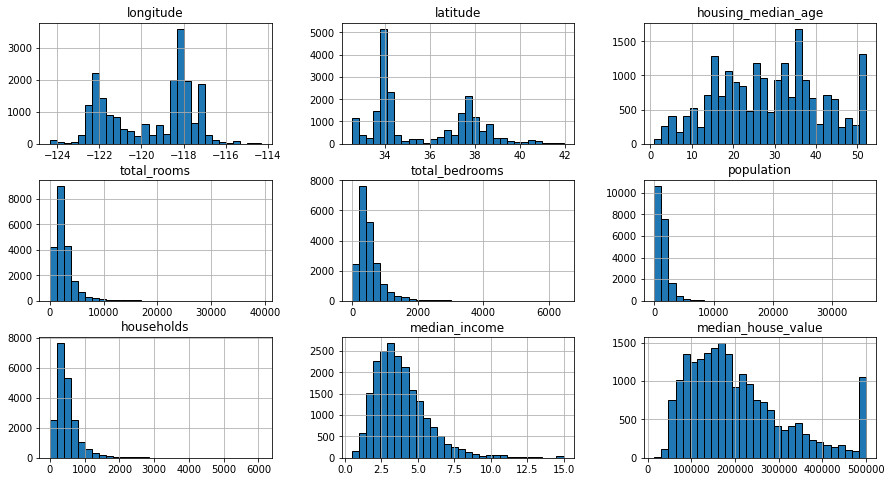

In [ ]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

TypeError: cannot convert the series to <class 'float'>

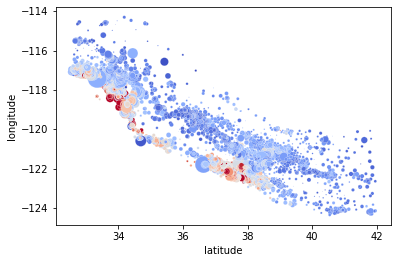

In [ ]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm",
               s=datos["population"]/100)

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

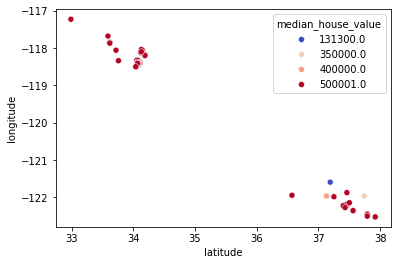

In [ ]:
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.median_income > 14)], hue="median_house_value", palette="coolwarm")

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
datos_na = datos.dropna()

In [ ]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#Convertir la caracteística categórica a numérica
#Proximidad al oceano
datos_na["ocean_proximity"]


0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [ ]:
datos_na["ocean_proximity"].value_counts()
# 1,2,3,4,5

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#Dummies / One-Hot Encoding
# NEAR BAY   INLAND   NEAR OCEAN
#    1          0         0
#    0          0         1

dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [ ]:
datos_na = datos_na.join(dummies)

In [ ]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [ ]:
datos_na = datos_na.drop(["ocean_proximity"], axis=1)

In [ ]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
#Analisis, nuevas caracteristicas

In [ ]:
datos.corr()

C:\Users\vecin\AppData\Local\Temp/ipykernel_1404/306414118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot: >

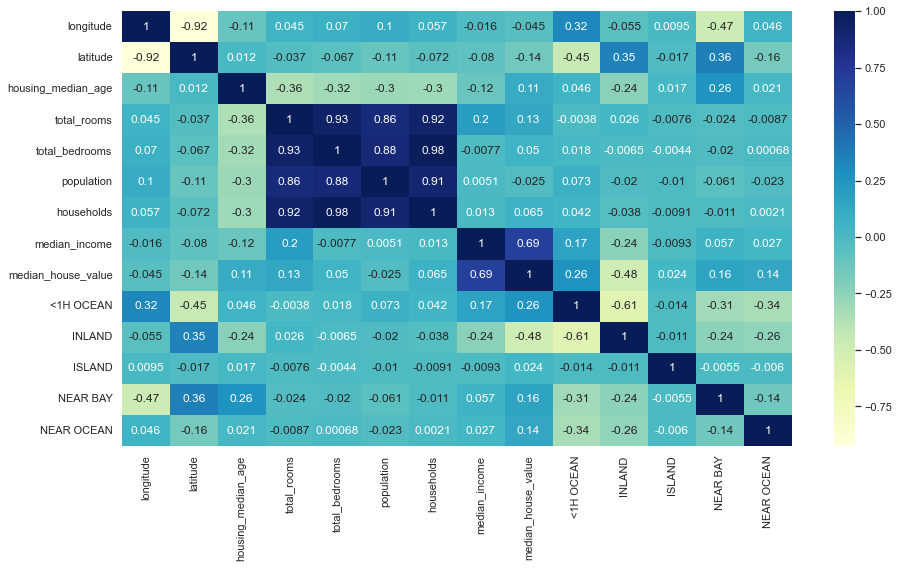

In [ ]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [ ]:
datos.corr()["median_house_value"].sort_values(ascending=False)

C:\Users\vecin\AppData\Local\Temp/ipykernel_1404/2210289708.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Continuando con el análisis podemos ver que el dato que tiene más relación con el precio de las casas es la media de los ingresos de quienes viven en ese bloque (median_income)

<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>

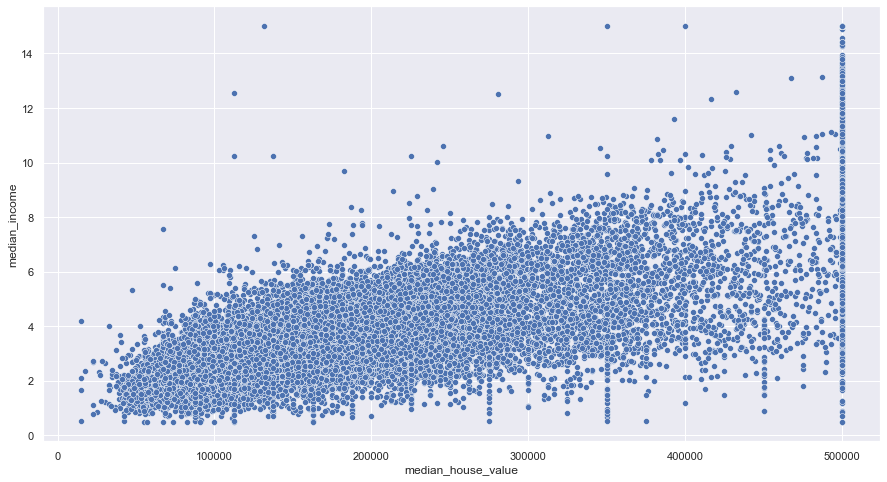

In [ ]:
sb.scatterplot(x=datos_na["median_house_value"], y=datos_na["median_income"])

Aqui podemos observar una relación: Entre más ingreso hay, más cuestan las casas de ese bloque.
Segun el conjunto de datos que usemos, podemos crear nuevas características. Por ejemplo, en este caso vamos a crear una que sea una proporción: ¿Cuántos de los cuartos son cuartos para dormir? (no todos los cuartos son bethrooms)

In [ ]:
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]

#Aqui creamos una nueva carácteristica

<AxesSubplot: >

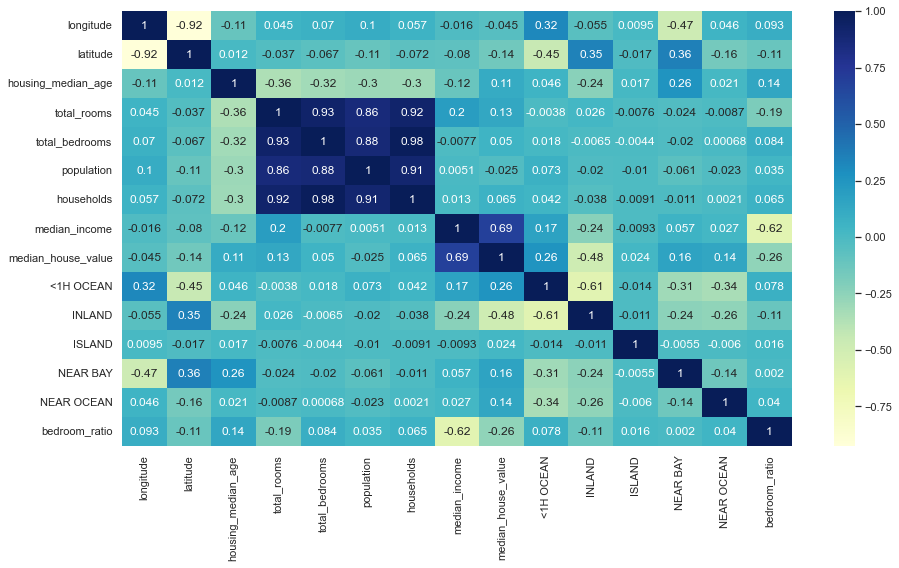

In [ ]:
#Hacemos de nuevo el heatmap:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

Y ahora nos damos cuenta que esta nueva caracteristica (bedrom ratio) tiene una relación de -0.26 mientras que antes rooms y bedrooms por si solas tenían unicamente 0.13 y 0.05.
Encontramos una relación más interesante: **Mientras menos de los cuartos sean recamaras para dormir, más cuesta la casa.**
Maybe tienen más cuartos para entretenimiento o limpieza.

In [ ]:
#Separaremos las características de la etiqueta
x = datos_na.drop(["median_house_value"], axis=1) #datos a predecir
y = datos_na["median_house_value"] #resultados

Separaremos nuestros datos en dos conjuntos. Uno para entrenar y otro para pruebas.

Un conjunto de entrenamiento es donde se entrena, se ajusta y mejora. Y una vez terminado usamos el de pruebas para usar datos que no vió en el entrenamiento y así ver si efectivamente aprendió o sólo memorizo datos.

In [ ]:
#Separamos los datos en dos partes. Un conjunto de entrenamiento y uno de pruebas
#Utilizamos sklearn para que nos ayude a separar los datos
from sklearn.model_selection import train_test_split

x_ent, x_pru, y_ent, y_pru = train_test_split(x,y, test_size=0.2) #el 20% en test_size es para separar cuanto de nuestro conjunto de datos queremos para entrenar
#Esto nos regresa 4 datos, por eso los guardamos en x_entrenamiento, x_pruebas, y_ent, y_pru

In [ ]:
#Para ver un poquito que tengan el mismo volumen de datos
x_ent.shape
#y_ent.shape
#x_pru.shape
#y_pru.shape

(16346, 14)

A partir de acá, podemos creamos nuestro modelo de **Machine Learning** utilizando Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()

Esto significa que modelo es ahora un objeto de regresión lineal que puedes entrenar con datos. En este punto, el modelo aún no ha aprendido nada de los datos; es simplemente una instancia del algoritmo de regresión lineal preparada para ser entrenada con datos de entrenamiento.

Para entrenarlo es lo siguiente:

In [ ]:
modelo.fit(x_ent, y_ent)
#solo para entrenarlo con las caracteristicas y resultados de entrenamiento para hacer los de pruebas después

LinearRegression()

 Este método ajusta el modelo lineal a los datos. Lo hace encontrando los coeficientes (incluyendo el intercepto) que minimizan el error cuadrático entre las predicciones del modelo y los valores reales en y_ent.
 El **"entrenamiento"** aquí se refiere a este proceso de ajuste.

Una vez entrenado, procedemos a hacer predicciones:

In [ ]:
predicciones = modelo.predict(x_pru)
#Le decimos que hagamos predicciones en nuestro conjunto de pruebas y luego compararlo con los resultados reales.

In [ ]:
#podemos visualizar las predicciones con una tabla
comparativa = {"Predicción": predicciones, "Valor Real": y_pru} #para ver lo que predijo contra el valor real, haciendo un diccionario
pd.DataFrame(comparativa)

,Predicción,Valor Real
8458,242812.130114,243100.0
8079,296742.801274,198900.0
386,307054.317492,270900.0
9628,74275.372317,87500.0
5228,151627.446997,84200.0
...,...,...
4198,152701.796874,168800.0
14167,196471.253876,158300.0
16566,210435.316569,240200.0
11438,255549.329962,363100.0


Como nos damos cuenta, en algunos datos esta muy cercano al valor real y en otros la distancia es muy lejos entre lo real y la predicción

En **Machine Learning** después del entrenamiento, en algunas ocasiones, el modelo funciona muy bien con los datos de entrenamiento y muy mal con los datos de pruebas y eso se llama **Overfitting** o sobreajuste

In [ ]:
print(modelo.score(x_ent, y_ent))
print(modelo.score(x_pru, y_pru))
# para evaluar la calidad del modelo de regresión lineal y para verificar si hay señales de overfitting.

0.6482442307179782
0.6661391485033304


In [ ]:
#Podemos calcular el Error. Podemos tomar todos los datos de nuestras predicciones y valores reales, agruparlos y ver que tanto estamos fallando en nuestras bibliotecas.

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pru, predicciones)
#toma todos los datos, saca la diferencia y la eleva al cuadrado


El **Mean Squared Error (Error cuadrantico medio)** es una métrica que mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrática promedio entre los valores estimados por nuestro modelo y los valores reales.


![image.png](attachment:image.png)


El MSE mide cuánto se desvían en promedio las predicciones del modelo de los valores reales. Cuanto menor sea el MSE, mejor, ya que un MSE bajo indica que las predicciones del modelo están, en promedio, cercanas a los valores reales.

In [ ]:
mse

4547401826.041491

Como vemos, nuestro valor es demasiado grande, por elevarlo al cuadrado. En temas de ML, no sólo calculamos el error, sino también los residuales. Esto, es para que los negativos se vuelvan positivos y las diferencias se vuelvan más notorias.

Podemos obtener su raíz cuadrada:

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse #esto nos da el promedio de cuanto estamos fallando al calcular el precio de todas las casas.

67434.42611931602

Normalmente cuando estamos entrenando, el modelo le dará más peso a los datos que tienen numeros más grandes, que a los más pequeños.

Podemos utilizar un Scaler, para poner a todos en un rango pequeño de manera que la diferencia entre máximos y mínimos no sea tanta.

Básicamente comprime los datos para que todos los datos estén mas o menos en un mismo rango y el modelo no le de tanta importancia a los números grandes.

In [ ]:
datos_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Scaler o Escalamiento
from sklearn.preprocessing import StandardScaler
#Podemos escalar los datos de entrenamiento y de pruebas. Sólo se tienen que hacer en las características, no es necesario hacerlo con las salidas, o sea lo que cuesta la casa.
scaler = StandardScaler()

x_ent_esc = scaler.fit_transform(x_ent)
x_pru_esc = scaler.transform(x_pru)

In [ ]:
x_ent #podemos ver los datos como estaban anteriormente

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
4483,-118.19,34.06,47.0,2324.0,658.0,3020.0,594.0,1.1868,1,0,0,0,0,0.283133
5064,-118.29,33.98,41.0,1582.0,416.0,1422.0,370.0,1.0516,1,0,0,0,0,0.262958
12035,-117.48,33.93,31.0,2191.0,459.0,1564.0,450.0,2.6776,0,1,0,0,0,0.209493
5430,-118.42,34.02,26.0,2664.0,842.0,1745.0,789.0,3.4269,1,0,0,0,0,0.316066
19448,-121.02,37.68,25.0,3262.0,588.0,1834.0,578.0,3.9960,0,1,0,0,0,0.180258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18425,-121.83,37.26,7.0,3609.0,751.0,1739.0,682.0,4.5033,1,0,0,0,0,0.208091
7860,-118.13,33.90,36.0,1477.0,305.0,788.0,291.0,3.6250,1,0,0,0,0,0.206500
3820,-118.48,34.20,23.0,2850.0,864.0,2249.0,777.0,2.6957,1,0,0,0,0,0.303158
4565,-118.26,34.07,40.0,680.0,273.0,995.0,249.0,2.2607,1,0,0,0,0,0.401471


In [ ]:
#pero si revisamos con el escalamiento
pd.DataFrame(x_ent_esc)
#Podemos observar que todos los datos los puso con números muy poequeños, pero ya no varían demasiado como 20200 vs 36.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.689367,-0.736016,1.459112,-0.139541,0.291148,1.414051,0.254775,-1.411620,1.126926,-0.683419,-0.011062,-0.351775,-0.38802,1.230058
1,0.639490,-0.773350,0.982825,-0.480157,-0.285956,0.002630,-0.335876,-1.482799,1.126926,-0.683419,-0.011062,-0.351775,-0.38802,0.876701
2,1.043491,-0.796683,0.189012,-0.200595,-0.183413,0.128051,-0.124929,-0.626749,-0.887370,1.463231,-0.011062,-0.351775,-0.38802,-0.059749
3,0.574651,-0.754683,-0.207894,0.016536,0.729938,0.287917,0.768958,-0.232260,1.126926,-0.683419,-0.011062,-0.351775,-0.38802,1.806897
4,-0.722141,0.953327,-0.287275,0.291049,0.124217,0.366526,0.212586,0.067358,-0.887370,1.463231,-0.011062,-0.351775,-0.38802,-0.571823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-1.126141,0.757326,-1.716137,0.450340,0.512928,0.282618,0.486817,0.334439,1.126926,-0.683419,-0.011062,-0.351775,-0.38802,-0.084315
16342,0.719293,-0.810683,0.585919,-0.528357,-0.550661,-0.557345,-0.544186,-0.127965,1.126926,-0.683419,-0.011062,-0.351775,-0.38802,-0.112185
16343,0.544725,-0.670682,-0.446037,0.101920,0.782402,0.733071,0.737316,-0.617219,1.126926,-0.683419,-0.011062,-0.351775,-0.38802,1.580807
16344,0.654453,-0.731349,0.903443,-0.894221,-0.626973,-0.374514,-0.654933,-0.846237,1.126926,-0.683419,-0.011062,-0.351775,-0.38802,3.302778


Con esto, podemos volver a realizar el entrenamiento. No siempre es necesario un escalamiento. Eso dependerá de nuestros modselos

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear una nueva instancia del modelo
modelo_esc = LinearRegression()

# Entrenar el modelo con los datos escalados
modelo_esc.fit(x_ent_esc, y_ent)


LinearRegression()

In [ ]:
# Hacer predicciones con el conjunto de prueba escalado
predicciones_esc = modelo_esc.predict(x_pru_esc)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calcular el RMSE para el modelo escalado
mse_esc = mean_squared_error(y_pru, predicciones_esc)
rmse_esc = np.sqrt(mse_esc)

In [ ]:
# Calcular el R² para el modelo escalado
r2_esc = r2_score(y_pru, predicciones_esc)

print("RMSE (Escalado):", rmse_esc)
print("R² (Escalado):", r2_esc)

RMSE (Escalado): 67431.45422667063
R² (Escalado): 0.6661685749195609


Los resultados que obtuvimos después de escalar los datos y reentrenar el modelo muestran que el RMSE es aproximadamente 67431.45 y el R² es 0.6662. Comparando estos valores con los que obtuvimos previamente (RMSE de 67434.43 y R² de 0.6661), hay una mejora muy ligera en ambos RMSE y R². Esto sugiere algunas cosas:

La calidad del modelo indica que el modelo puede explicar aproximadamente el 66.62% de la variabilidad en la variable objetivo, lo cual es razonablemente bueno dependiendo del contexto del problema y la naturaleza de los datos. La evaluación de si es "bueno" o "malo" depende de la escala de la variable objetivo y las necesidades específicas o expectativas del modelo con relación al precio de las casas.

**Conclusión**
Si bien el escalamiento no cambió drásticamente el rendimiento del modelo en este caso, es una práctica recomendada en muchos escenarios de modelado, especialmente cuando se trabaja con algoritmos sensibles a la escala de las características o cuando se incluyen términos de regularización.